In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
import env
from env import host,user,password

In [3]:
df = pd.read_sql("SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips FROM properties_2017;",env.get_db_url('zillow'))

In [4]:
#importing the sql file

In [5]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [6]:
#Checking everything works

In [7]:
wrangle = df.fillna(0)
wrangle.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,0.0,9.0,0.0,0.00,6037.0
1,0.0,0.0,0.0,27516.0,0.0,0.00,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [8]:
#filling out all null values

In [9]:
zillow = wrangle[wrangle['calculatedfinishedsquarefeet'] != 0]
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0
5,0.0,0.0,2400.0,287634.0,1943.0,3661.28,6037.0
7,0.0,0.0,3611.0,698984.0,1946.0,7857.84,6037.0


In [10]:
#removing the calculated square feet since I don't think people are intested in places with no feet.

In [11]:
wrangle_zillow = wrangle[wrangle['bedroomcnt'] != 0]
wrangle_zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
10,4.0,4.0,3095.0,192544.0,2016.0,2460.72,6037.0
20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
28,5.0,4.0,2865.0,831224.0,1972.0,10455.41,6037.0
30,2.0,2.0,1090.0,357568.0,2004.0,6165.36,6037.0
31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0


In [12]:
#realized something, tried something different and removed places with no bedrooms since most people want a house, and houses have rooms.
#yes, I know some would like land, but I'm sure most use Zillow for houses.

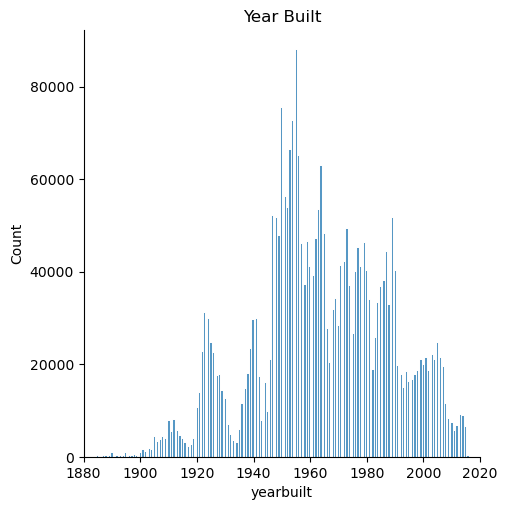

In [13]:
sns.displot(x='yearbuilt',data=wrangle_zillow)
plt.title('Year Built')
ax = plt.gca()
ax.set_xlim([1880, 2020])
plt.show()

In [14]:
#Made a graph based on the houses built year.